In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

plt.style.use(['science', 'nature'])

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
df1 = pd.read_csv("./Data/Fig2_a_Pubmed_baseline.csv")
df2 = pd.read_csv("./Data/Fig2_a_Pubmed_comted.csv")

In [6]:
is_subset = df2['pmid'].isin(df1['pmid'])
is_subset[is_subset == False]
df2.drop(is_subset[is_subset == False].index, inplace=True)

In [7]:
log1 = df1["total"] + 1
log2 = df2["total"]+ 1

In [8]:
# 初始化Kaplan-Meier估计器
kmf = KaplanMeierFitter()
# 计算生存曲线数据
kmf.fit(df1['total'])
# 将生存概率转换为列表
survival_prob_list = kmf.survival_function_.reset_index()

# 绘制生存曲线图
x1 = survival_prob_list["timeline"]
y1 = survival_prob_list['KM_estimate']

kmf = KaplanMeierFitter()
# 计算生存曲线数据
kmf.fit(df2['total'])
# 将生存概率转换为列表
survival_prob_list = kmf.survival_function_.reset_index()
x2 = survival_prob_list["timeline"]
y2 = survival_prob_list['KM_estimate']

C:\Users\17469\AppData\Local\Temp\ipykernel_12140\3808214090.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


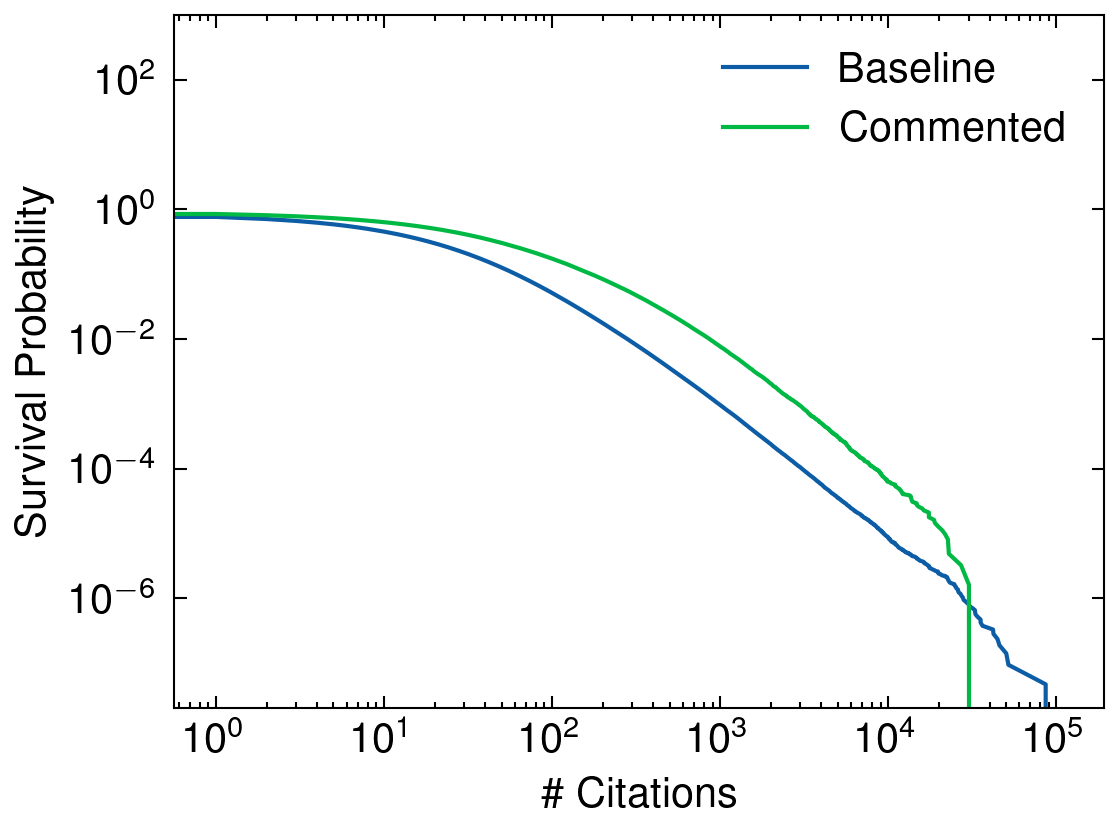

In [10]:
plt.figure(figsize=(4, 3), dpi=300)
ax1 = sns.lineplot(x=x1, y=y1,label="Baseline")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params("both", labelsize=10)
ax2 = sns.lineplot(x=x2, y=y2,label="Commented")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params("both", labelsize=10)

plt.ylim(0, 1000)
# 添加标题和标签
# plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('\\# Citations', fontsize=10)
plt.ylabel('Survival Probability', fontsize=10)
plt.legend(fontsize=10)
plt.show()